# **Bioinformatics Project: Computational Drug Discovery [Part 4]: Regression Models with Random Forest**

Hamza Ahmed

---

### **Import Libraries**

In [57]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### **Load the DataSet**

In [4]:
df = pd.read_csv('data_Part3/acetylcholinesterase_04_bioactivity_data_3class_pIC50_fp.csv')

### **Input Features**
The **Acetylcholinesterase** data set contains 881 input features (the molecular fingerprints) and 1 output variable (pIC50)

**Load X**

In [8]:
X = df.drop(columns=['pIC50'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Load Output Features**

In [9]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

**Examine the data dimensions**

In [10]:
X.shape

(4695, 881)

In [11]:
Y.shape

(4695,)

### **Remove Low Variance Samples**

We are assuming a VarianceThreshold of 0.16: Any features with variance below this value will be removed

In [13]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1-0.8)))
X = selection.fit_transform(X)

In [14]:
X.shape

(4695, 137)

### **Split the Data in an 80/20 Fashion**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

## **Building a Regression Model using Random Forest**

In [21]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.31769987602963357

### **Interpretation**

A $R{^2}$ of 0.32 suggests a less then moderate level of predictive power. 

In [22]:
Y_pred = model.predict(X_test)

### **Scatter Plot of Experimental vs Predicted pIC50 values**

<function matplotlib.pyplot.show(close=None, block=None)>

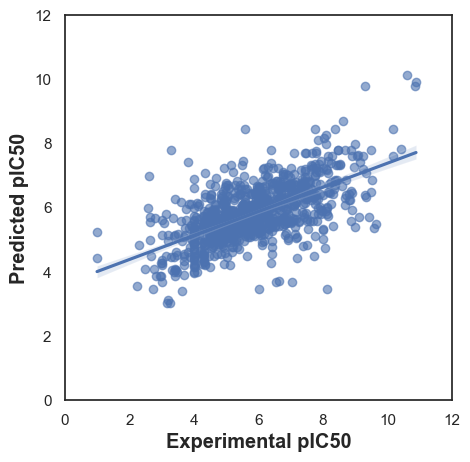

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.6})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **Trying to Improve the model's predictive Power**

### **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_

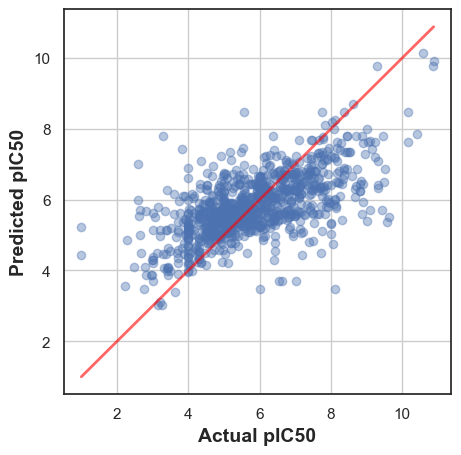

In [51]:

Y_pred = best_model.predict(X_test)

plt.figure(figsize=(5, 5))
plt.scatter(x=Y_test, y=Y_pred, alpha=0.4, color='b')

# Add a line for the perfect prediction, created by plotting minimum to maximum values of Y_test against themselves
plt.plot([min(Y_test), max(Y_test)],[min(Y_test), max(Y_test)], color='red', alpha=0.6, linestyle='-', linewidth=2)

plt.xlabel('Actual pIC50', fontsize=14, fontweight='bold')
plt.ylabel('Predicted pIC50', fontsize=14, fontweight='bold')
plt.grid(True)

### **Comparing the original model with the best model for GridSearch**

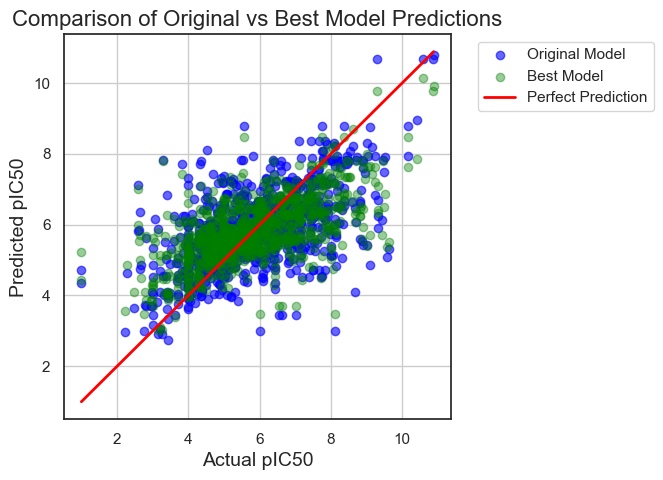

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your original model and 'best_model' is the best model from GridSearchCV
# 'X_test', 'Y_test' are your test data

# Step 1: Make predictions with both models
Y_pred_original = model.predict(X_test)
Y_pred_best = best_model.predict(X_test)

# Step 2: Create the scatter plot
plt.figure(figsize=(5, 5))

# Plot predictions from the original model
plt.scatter(Y_test, Y_pred_original, alpha=0.6, color='blue', label='Original Model')

# Plot predictions from the best-fit model
plt.scatter(Y_test, Y_pred_best, alpha=0.4, color='green', label='Best Model')

# Step 3: Add a line for perfect predictions
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='-', linewidth=2, label='Perfect Prediction')

# Step 4: Add labels, title, and legend
plt.xlabel('Actual pIC50', fontsize=14)
plt.ylabel('Predicted pIC50', fontsize=14)
plt.title('Comparison of Original vs Best Model Predictions', fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1))
plt.grid(True)

plt.show()